In [1]:
import pandas as pd

# Read the JSON file into a DataFrame
df = pd.read_json('P1- BankStatements.json')

# Display the first few rows of the DataFrame
print(df.head())


                                                  Account
type                                              deposit
maskedAccNumber                                  XXXX6461
version                                               1.1
linkedAccRef         02f28b8d-d8a3-43d7-88c6-5fabb2e51541
xmlns            http://api.rebit.org.in/FISchema/deposit


In [2]:
import pandas as pd
import json
from pandas import json_normalize

# Load the JSON data
with open('P1- BankStatements.json', 'r') as file:
    data = json.load(file)

# Normalize and create DataFrame for Account Profile
account_profile = json_normalize(data['Account']['Profile']['Holders']['Holder'])
print("Account Profile DataFrame:")
print(account_profile)

# Normalize and create DataFrame for Account Summary
account_summary = json_normalize(data['Account']['Summary'])
print("\nAccount Summary DataFrame:")
print(account_summary)

# Normalize and create DataFrame for Transactions
transactions = json_normalize(data['Account']['Transactions']['Transaction'])
print("\nTransactions DataFrame:")
print(transactions)


Account Profile DataFrame:
          name         dob      mobile     nominee address email     pan  \
0  Arun Shakya  2000-06-09  8429489761  REGISTERED            NA  FORM60   

  ckycCompliance  
0           true  

Account Summary DataFrame:
  currentBalance currency exchgeRate            balanceDateTime     type  \
0         761.41      INR          1  2024-05-30T03:05:12+05:30  SAVINGS   

             branch     ifscCode   micrCode openingDate currentODLimit  \
0  AMETHI JADID, UP  BARB0AMEJAD  209012004  2020-11-24           0.00   

  drawingLimit  status Pending.amount  
0         0.00  ACTIVE            0.0  

Transactions DataFrame:
       type    mode  amount currentBalance       transactionTimestamp  \
0     DEBIT    CARD   100.0        2180.80  2023-06-27T09:40:19+05:30   
1     DEBIT    CARD   170.0        2010.80  2023-06-28T09:51:57+05:30   
2     DEBIT    CARD   500.0        1510.80  2023-07-26T10:04:00+05:30   
3    CREDIT  OTHERS    15.0        1525.80  2023-08-06T

Total number of transactions: 985


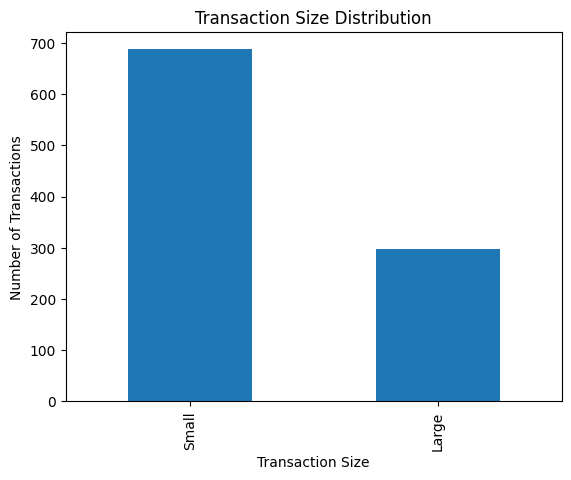

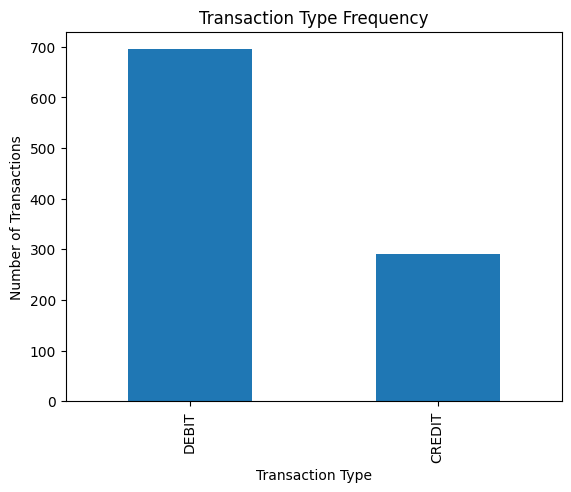

Transaction Size Distribution:
transaction_size
Small    687
Large    298
Name: count, dtype: int64

Transaction Type Frequency:
type
DEBIT     695
CREDIT    290
Name: count, dtype: int64


In [4]:
import pandas as pd
import json
from pandas import json_normalize
import matplotlib.pyplot as plt

# Load the JSON data
with open('P1- BankStatements.json', 'r') as file:
    data = json.load(file)

# Normalize and create DataFrame for Transactions
transactions = json_normalize(data['Account']['Transactions']['Transaction'])

# Convert relevant columns to appropriate data types
transactions['amount'] = transactions['amount'].astype(float)
transactions['transactionTimestamp'] = pd.to_datetime(transactions['transactionTimestamp'])

# 1. Total number of transactions made over the year
total_transactions = transactions.shape[0]
print(f"Total number of transactions: {total_transactions}")

# 2. Distribution of transaction amounts (define small vs. large transactions)
# Let's define small transactions as those less than 500 and large transactions as 500 or more
small_transaction_threshold = 500

transactions['transaction_size'] = transactions['amount'].apply(
    lambda x: 'Small' if x < small_transaction_threshold else 'Large'
)

# Plot the distribution of transaction amounts
transaction_size_counts = transactions['transaction_size'].value_counts()
transaction_size_counts.plot(kind='bar', title='Transaction Size Distribution')
plt.xlabel('Transaction Size')
plt.ylabel('Number of Transactions')
plt.show()

# 3. Frequency of different transaction types (debit vs. credit)
transaction_type_counts = transactions['type'].value_counts()
transaction_type_counts.plot(kind='bar', title='Transaction Type Frequency')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.show()

# Output the analysis
print("Transaction Size Distribution:")
print(transaction_size_counts)

print("\nTransaction Type Frequency:")
print(transaction_type_counts)


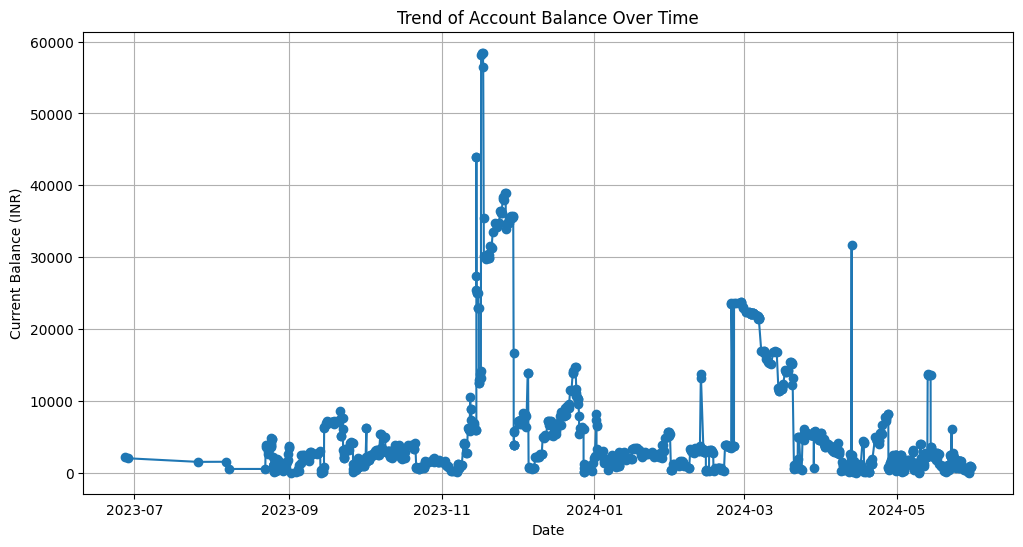

  type   mode  amount  currentBalance      transactionTimestamp  valueDate     txnId                                          narration       reference  balance_change
CREDIT    UPI  3000.0         3524.80 2023-08-22 11:49:13+05:30 2023-08-22 S90667553     UPI/323441197152/114914/UPI/8795417446ybl/Paym              NA         3000.00
 DEBIT    UPI  1200.0         2624.80 2023-08-23 08:17:48+05:30 2023-08-23 S20566812     UPI/323568910825/081748/UPI/8795417446ybl/Paym              NA        -1200.00
 DEBIT    UPI  2480.0         2244.80 2023-08-25 10:24:38+05:30 2023-08-25  S1271195     UPI/323779418599/102438/UPI/Q201531625ybl/Paym              NA        -2480.00
 DEBIT    UPI  1450.0          794.80 2023-08-25 10:39:35+05:30 2023-08-25  S1851691     UPI/323723435211/103935/UPI/KAYUMTRADERSicici/              NA        -1450.00
 DEBIT    UPI  1499.0          315.80 2023-08-27 12:19:54+05:30 2023-08-27 S80757332     UPI/323955508725/121953/UPI/9455566771ibl/Paym              NA        -

In [5]:
import pandas as pd
import json
from pandas import json_normalize
import matplotlib.pyplot as plt

# Load the JSON data
with open('P1- BankStatements.json', 'r') as file:
    data = json.load(file)

# Normalize and create DataFrame for Transactions
transactions = json_normalize(data['Account']['Transactions']['Transaction'])

# Convert relevant columns to appropriate data types
transactions['currentBalance'] = transactions['currentBalance'].astype(float)
transactions['transactionTimestamp'] = pd.to_datetime(transactions['transactionTimestamp'])

# 1. Trend of the account balance over time
plt.figure(figsize=(12, 6))
plt.plot(transactions['transactionTimestamp'], transactions['currentBalance'], marker='o', linestyle='-')
plt.title('Trend of Account Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Current Balance (INR)')
plt.grid(True)
plt.show()

# 2. Identify periods with significant changes in the account balance
# Calculate the change in balance between consecutive transactions
transactions['balance_change'] = transactions['currentBalance'].diff()

# Define a threshold for significant change (e.g., changes greater than 1000)
significant_change_threshold = 1000
significant_changes = transactions[transactions['balance_change'].abs() > significant_change_threshold]

# Output periods with significant changes
#print("Periods with Significant Changes in Account Balance:")
#print(significant_changes[['transactionTimestamp', 'currentBalance', 'balance_change']])
print(significant_changes.to_string(index=False))

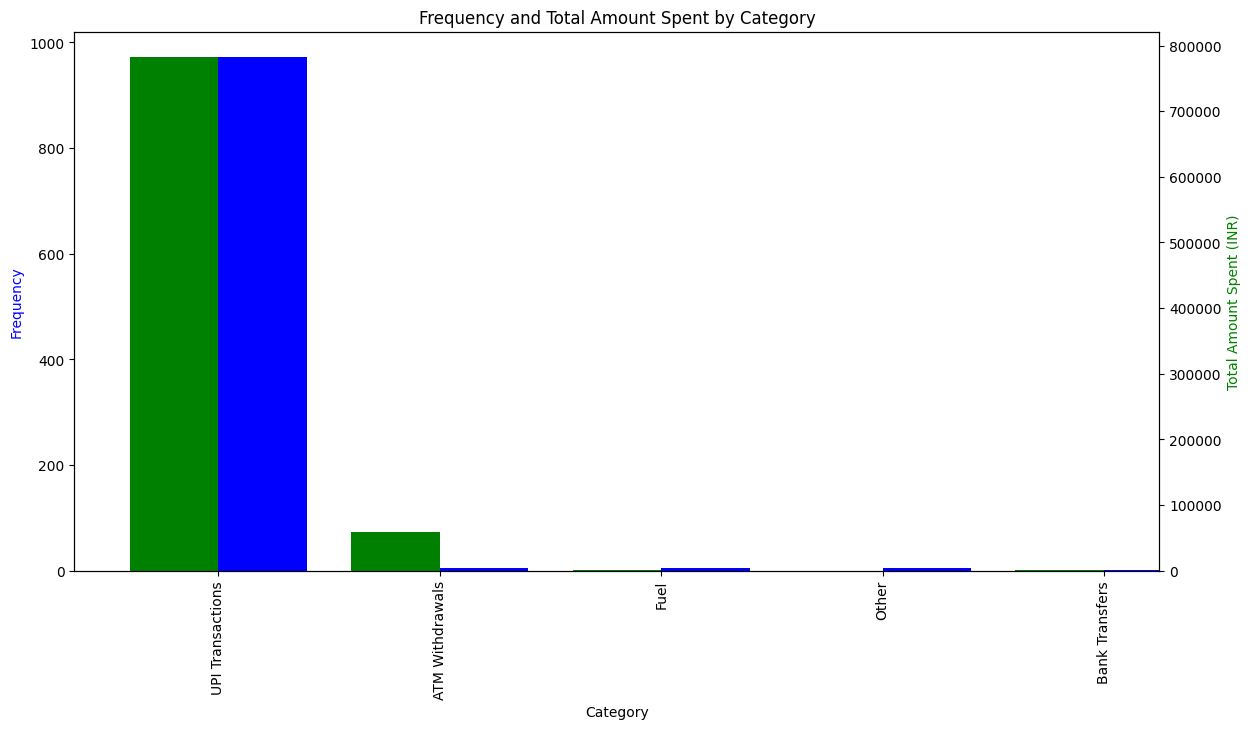

Spending Patterns by Category:
           category  frequency  total_amount
4  UPI Transactions        972     782195.41
0   ATM Withdrawals          4      58500.00
2              Fuel          4        830.00
3             Other          4        135.00
1    Bank Transfers          1       1000.00


In [9]:
import pandas as pd
import json
from pandas import json_normalize
import matplotlib.pyplot as plt

# Load the JSON data
with open('P1- BankStatements.json', 'r') as file:
    data = json.load(file)

# Normalize and create DataFrame for Transactions
transactions = json_normalize(data['Account']['Transactions']['Transaction'])

# Convert relevant columns to appropriate data types
transactions['amount'] = transactions['amount'].astype(float)
transactions['transactionTimestamp'] = pd.to_datetime(transactions['transactionTimestamp'])

# Define more specific categories based on narrations
def categorize_transaction(narration):
    narration = narration.lower()
    if 'fuel' in narration or 'filling' in narration or 'petrol' in narration or 'diesel' in narration:
        return 'Fuel'
    elif 'amazon' in narration or 'flipkart' in narration or 'ecommerce' in narration:
        return 'Ecommerce'
    elif 'restaurant' in narration or 'food' in narration or 'cafe' in narration or 'dining' in narration or 'meal' in narration:
        return 'Food'
    elif 'shopping' in narration or 'store' in narration or 'mall' in narration:
        return 'Shopping'
    elif 'atm' in narration or 'cash' in narration or 'withdrawal' in narration:
        return 'ATM Withdrawals'
    elif 'upi' in narration or 'gpay' in narration or 'paytm' in narration or 'phonepe' in narration or 'bhim' in narration:
        return 'UPI Transactions'
    elif 'transfer' in narration or 'neft' in narration or 'rtgs' in narration or 'imps' in narration:
        return 'Bank Transfers'
    elif 'utility' in narration or 'bill' in narration or 'electricity' in narration or 'water' in narration or 'gas' in narration:
        return 'Utility Bills'
    elif 'rent' in narration or 'lease' in narration:
        return 'Rent'
    elif 'salary' in narration or 'income' in narration or 'credit' in narration:
        return 'Income'
    elif 'insurance' in narration or 'premium' in narration:
        return 'Insurance'
    elif 'loan' in narration or 'emi' in narration or 'mortgage' in narration:
        return 'Loan Payments'
    elif 'entertainment' in narration or 'movie' in narration or 'theater' in narration or 'concert' in narration:
        return 'Entertainment'
    elif 'subscription' in narration or 'membership' in narration or 'netflix' in narration or 'spotify' in narration:
        return 'Subscriptions'
    else:
        return 'Other'

transactions['category'] = transactions['narration'].apply(categorize_transaction)

# Analyze the frequency and amount of spending in each category
category_summary = transactions.groupby('category').agg(
    frequency=('category', 'size'),
    total_amount=('amount', 'sum')
).reset_index()

# Sort the summary by frequency for better visualization
category_summary = category_summary.sort_values(by='frequency', ascending=False)

# Plot the frequency and total amount spent in each category
fig, ax1 = plt.subplots(figsize=(14, 7))

ax2 = ax1.twinx()
category_summary.plot(kind='bar', x='category', y='frequency', ax=ax1, position=0, color='blue', width=0.4, legend=False)
category_summary.plot(kind='bar', x='category', y='total_amount', ax=ax2, position=1, color='green', width=0.4, legend=False)

ax1.set_xlabel('Category')
ax1.set_ylabel('Frequency', color='blue')
ax2.set_ylabel('Total Amount Spent (INR)', color='green')
plt.title('Frequency and Total Amount Spent by Category')
plt.show()

# Output the category summary
print("Spending Patterns by Category:")
print(category_summary)


C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_20160\171209930.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_transactions['income_category'] = income_transactions['narration'].apply(categorize_income)


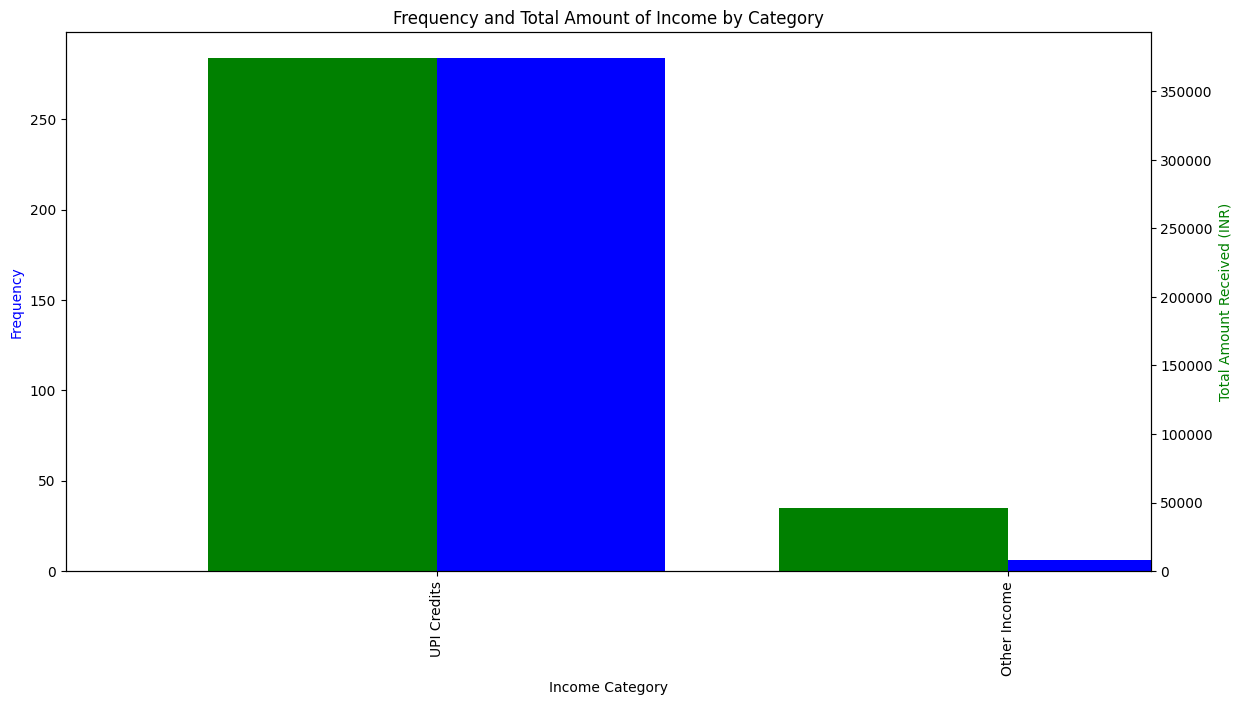

C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_20160\171209930.py:54: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  income_transactions['month'] = income_transactions['transactionTimestamp'].dt.to_period('M')
C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_20160\171209930.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_transactions['month'] = income_transactions['transactionTimestamp'].dt.to_period('M')


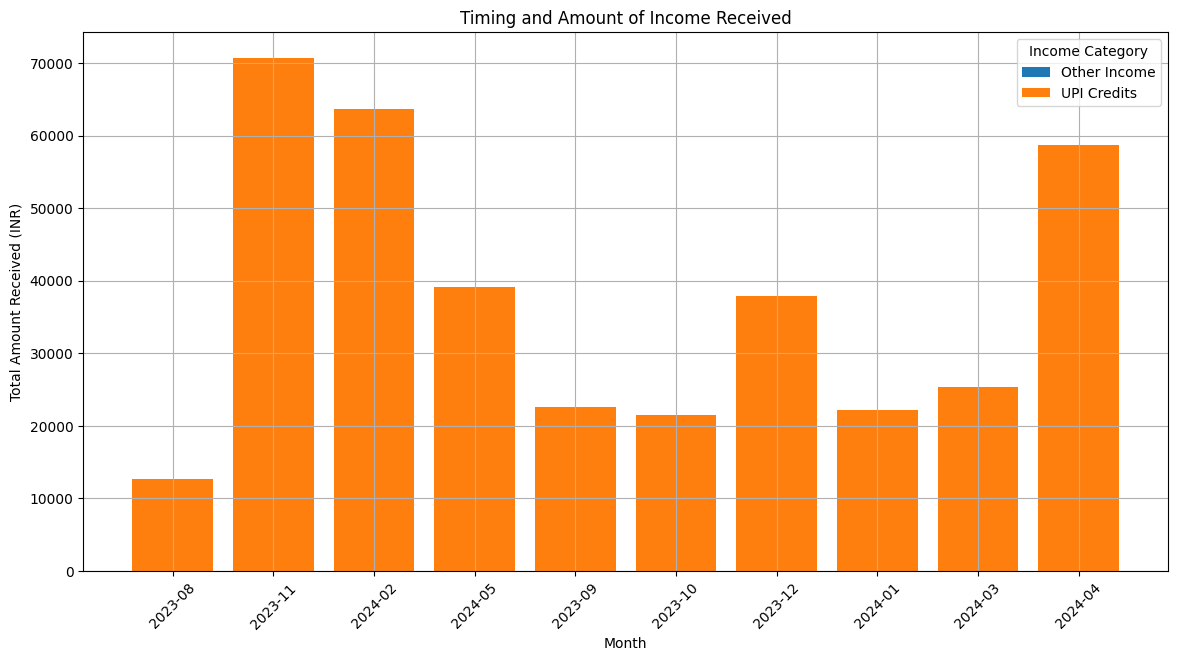

Income Patterns by Category:
  income_category  frequency  total_amount
1     UPI Credits        284     374435.51
0    Other Income          6      46135.00

Monthly Income Summary:
   income_category    month  total_amount
0     Other Income  2023-08         15.00
1     Other Income  2023-11      45015.00
2     Other Income  2024-02         58.00
3     Other Income  2024-05       1047.00
4      UPI Credits  2023-08      12664.00
5      UPI Credits  2023-09      22605.00
6      UPI Credits  2023-10      21472.00
7      UPI Credits  2023-11      70722.00
8      UPI Credits  2023-12      37953.51
9      UPI Credits  2024-01      22127.00
10     UPI Credits  2024-02      63724.00
11     UPI Credits  2024-03      25420.00
12     UPI Credits  2024-04      58660.00
13     UPI Credits  2024-05      39088.00


In [13]:
import pandas as pd
import json
from pandas import json_normalize
import matplotlib.pyplot as plt

# Load the JSON data
with open('P1- BankStatements.json', 'r') as file:
    data = json.load(file)

# Normalize and create DataFrame for Transactions
transactions = json_normalize(data['Account']['Transactions']['Transaction'])

# Convert relevant columns to appropriate data types
transactions['amount'] = transactions['amount'].astype(float)
transactions['transactionTimestamp'] = pd.to_datetime(transactions['transactionTimestamp'])

# Define income categories based on narrations
def categorize_income(narration):
    narration = narration.lower()
    if 'salary' in narration or 'income' in narration or 'credit' in narration:
        return 'Salary'
    elif 'upi' in narration or 'gpay' in narration or 'paytm' in narration or 'phonepe' in narration or 'bhim' in narration:
        return 'UPI Credits'
    else:
        return 'Other Income'

# Filter for income transactions (assuming credit transactions indicate income)
income_transactions = transactions[transactions['type'].str.upper() == 'CREDIT']
income_transactions['income_category'] = income_transactions['narration'].apply(categorize_income)

# Analyze the frequency and amount of income in each category
income_summary = income_transactions.groupby('income_category').agg(
    frequency=('income_category', 'size'),
    total_amount=('amount', 'sum')
).reset_index()

# Sort the summary by total amount for better visualization
income_summary = income_summary.sort_values(by='total_amount', ascending=False)

# Plot the frequency and total amount of income by category
fig, ax1 = plt.subplots(figsize=(14, 7))

ax2 = ax1.twinx()
income_summary.plot(kind='bar', x='income_category', y='frequency', ax=ax1, position=0, color='blue', width=0.4, legend=False)
income_summary.plot(kind='bar', x='income_category', y='total_amount', ax=ax2, position=1, color='green', width=0.4, legend=False)

ax1.set_xlabel('Income Category')
ax1.set_ylabel('Frequency', color='blue')
ax2.set_ylabel('Total Amount Received (INR)', color='green')
plt.title('Frequency and Total Amount of Income by Category')
plt.show()

# Identify patterns in the timing and amount of income received
income_transactions['month'] = income_transactions['transactionTimestamp'].dt.to_period('M')
monthly_income_summary = income_transactions.groupby(['income_category', 'month']).agg(
    total_amount=('amount', 'sum')
).reset_index()

# Plot the timing and amount of income received as a bar plot
fig, ax = plt.subplots(figsize=(14, 7))

# Bar plot for each income category
for category in monthly_income_summary['income_category'].unique():
    subset = monthly_income_summary[monthly_income_summary['income_category'] == category]
    ax.bar(subset['month'].astype(str), subset['total_amount'], label=category)

ax.set_xlabel('Month')
ax.set_ylabel('Total Amount Received (INR)')
plt.title('Timing and Amount of Income Received')
plt.legend(title='Income Category')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Output the income summary
print("Income Patterns by Category:")
print(income_summary)
print("\nMonthly Income Summary:")
print(monthly_income_summary)


Suspicious Transactions:
         transactionTimestamp   amount  \
78  2023-09-14 21:14:51+05:30   5500.0   
275 2023-11-14 18:31:11+05:30  37999.0   
277 2023-11-14 18:49:41+05:30  16500.0   
285 2023-11-15 17:48:21+05:30  10000.0   
291 2023-11-16 15:51:14+05:30  45000.0   
295 2023-11-17 16:34:54+05:30  21000.0   
296 2023-11-17 18:32:29+05:30   5200.0   
332 2023-11-29 16:15:33+05:30  19000.0   
333 2023-11-29 17:09:47+05:30  12700.0   
351 2023-12-05 07:08:30+05:30   7560.0   
353 2023-12-05 15:50:06+05:30  13000.0   
535 2024-02-12 13:22:57+05:30  10000.0   
537 2024-02-13 14:01:51+05:30  10000.0   
570 2024-02-24 18:55:15+05:30  20000.0   
572 2024-02-25 11:08:34+05:30  20000.0   
576 2024-02-25 20:08:58+05:30  20000.0   
648 2024-03-20 18:56:48+05:30  12000.0   
743 2024-04-12 20:47:44+05:30  30000.0   
744 2024-04-12 20:50:06+05:30  30000.0   
794 2024-04-27 13:08:14+05:30   7500.0   
884 2024-05-13 06:54:41+05:30  11530.0   
889 2024-05-14 11:51:56+05:30  10000.0   

        

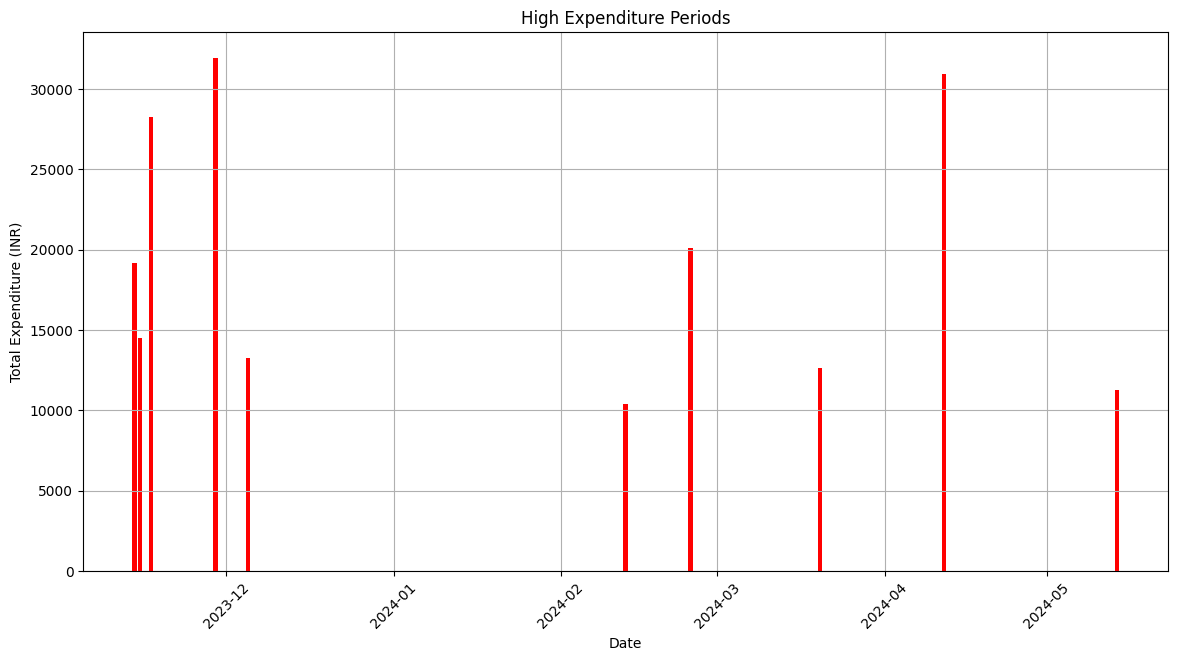

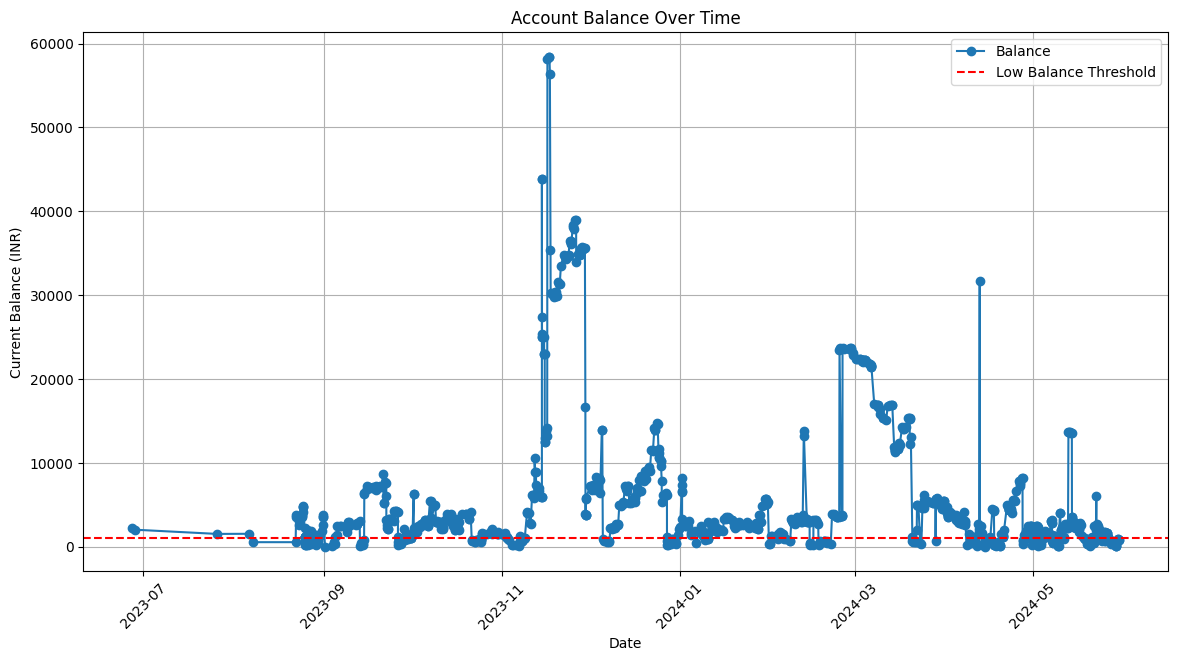

In [1]:
import pandas as pd
import json
from pandas import json_normalize
import matplotlib.pyplot as plt

# Load the JSON data
with open('P1- BankStatements.json', 'r') as file:
    data = json.load(file)

# Normalize and create DataFrame for Transactions
transactions = json_normalize(data['Account']['Transactions']['Transaction'])

# Convert relevant columns to appropriate data types
transactions['amount'] = transactions['amount'].astype(float)
transactions['transactionTimestamp'] = pd.to_datetime(transactions['transactionTimestamp'])
transactions['currentBalance'] = transactions['currentBalance'].astype(float)

# Define threshold values
high_transaction_threshold = 5000.0
low_balance_threshold = 1000.0
high_expenditure_threshold = 10000.0

# Identify unusual or suspicious transactions
suspicious_transactions = transactions[transactions['amount'] > high_transaction_threshold]

# Generate alerts for low balance
low_balance_alerts = transactions[transactions['currentBalance'] < low_balance_threshold]

# Generate alerts for high expenditure periods
transactions['date'] = transactions['transactionTimestamp'].dt.date
daily_expenditure = transactions[transactions['type'].str.upper() == 'DEBIT'].groupby('date').agg(
    total_expenditure=('amount', 'sum')
).reset_index()

high_expenditure_alerts = daily_expenditure[daily_expenditure['total_expenditure'] > high_expenditure_threshold]

# Output the alerts
print("Suspicious Transactions:")
print(suspicious_transactions[['transactionTimestamp', 'amount', 'narration']])
print("\nLow Balance Alerts:")
print(low_balance_alerts[['transactionTimestamp', 'currentBalance']])
print("\nHigh Expenditure Alerts:")
print(high_expenditure_alerts)

# Plot high expenditure periods
plt.figure(figsize=(14, 7))
plt.bar(high_expenditure_alerts['date'], high_expenditure_alerts['total_expenditure'], color='red')
plt.xlabel('Date')
plt.ylabel('Total Expenditure (INR)')
plt.title('High Expenditure Periods')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot low balance periods
plt.figure(figsize=(14, 7))
plt.plot(transactions['transactionTimestamp'], transactions['currentBalance'], marker='o', label='Balance')
plt.axhline(low_balance_threshold, color='red', linestyle='--', label='Low Balance Threshold')
plt.xlabel('Date')
plt.ylabel('Current Balance (INR)')
plt.title('Account Balance Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
